In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [234]:
#read in heart disease data
df = pd.read_csv(r'C:\Users\peter\metis\heart_disease_health_indicators_BRFSS2015.csv')
#data has over 200,000 rows
#select subset from random
df = df.sample(n=100_000, random_state = 42)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,Sex,Age,GenHlth,MentHlth,PhysHlth,DiffWalk,Education,Income
219620,0,0,0,1,21,0,0,0,0,1,...,1,0,0,7,3,3,7,0,4,2
132821,0,1,1,1,28,0,0,0,1,1,...,1,0,0,13,3,0,0,0,6,6
151862,0,0,0,1,24,0,0,0,1,1,...,1,0,1,1,1,0,0,0,4,7
139717,0,0,0,1,27,1,0,0,1,0,...,1,0,1,2,2,3,0,0,4,7
239235,0,0,1,1,31,1,0,0,0,1,...,1,1,0,8,4,27,27,1,3,2


In [235]:
#select some potential predictive variables
X = df.loc[:,'HighBP':'Age']
#define target variable: history of heart disease or heart attack
y = df['HeartDiseaseorAttack']

98

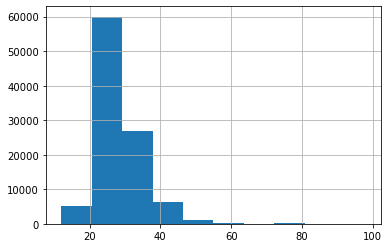

In [236]:
#histogram of BMI
min = X.BMI.min()
max = X.BMI.max()
#X.BMI.hist(bins=[min, 18.5, 25, 30, 35, 40, 50, 60, 70, max] )
X.BMI.hist()
#consider recoloring for overweight, obese
max

C:\Users\peter\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

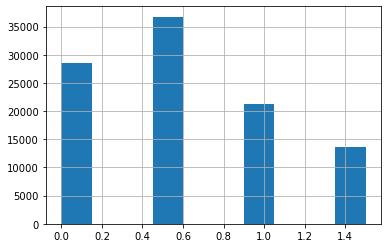

In [237]:
#regularize BMI
X.loc[X["BMI"] >= 35, "BMI"] = 1.5
X.loc[X["BMI"] >= 30, "BMI"] = 1
X.loc[X["BMI"] >= 25, "BMI"] = 0.5
X.loc[X["BMI"] >= min, "BMI"] = 0
X.BMI.hist()

In [238]:
#regularize Age
#6 44-49
#7+: 50+
X.loc[X["Age"] <= 7, "Age"] = 0
X.loc[X["Age"] >= 8, "Age"] = 1

In [206]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Sex,Age
219620,0,0,1,0.0,0,0,0,0,1,1,0,1,0,0,0
132821,1,1,1,0.5,0,0,0,1,1,1,0,1,0,0,1
151862,0,0,1,0.0,0,0,0,1,1,1,0,1,0,1,0
139717,0,0,1,0.5,1,0,0,1,0,1,1,1,0,1,0
239235,0,1,1,1.0,1,0,0,0,1,1,0,1,1,0,1


In [207]:
y.head()

219620    0
132821    0
151862    0
139717    0
239235    0
Name: HeartDiseaseorAttack, dtype: int64

In [208]:
#split for test data from train data
y_train, y_test = train_test_split(y, test_size=0.2, random_state = 42)
#split for validate data from train data
y_train, y_validate = train_test_split(y_train, test_size=0.25, random_state = 42)

X_train, X_test = train_test_split(X, test_size=0.2, random_state = 42)
X_train, X_validate = train_test_split(X_train, test_size=0.25, random_state = 42)

In [140]:
#baseline probability of having heart disease amongst respondents
np.mean(y_train)

0.09391666666666666

In [ ]:
#X_train.resprate_mean.hist()

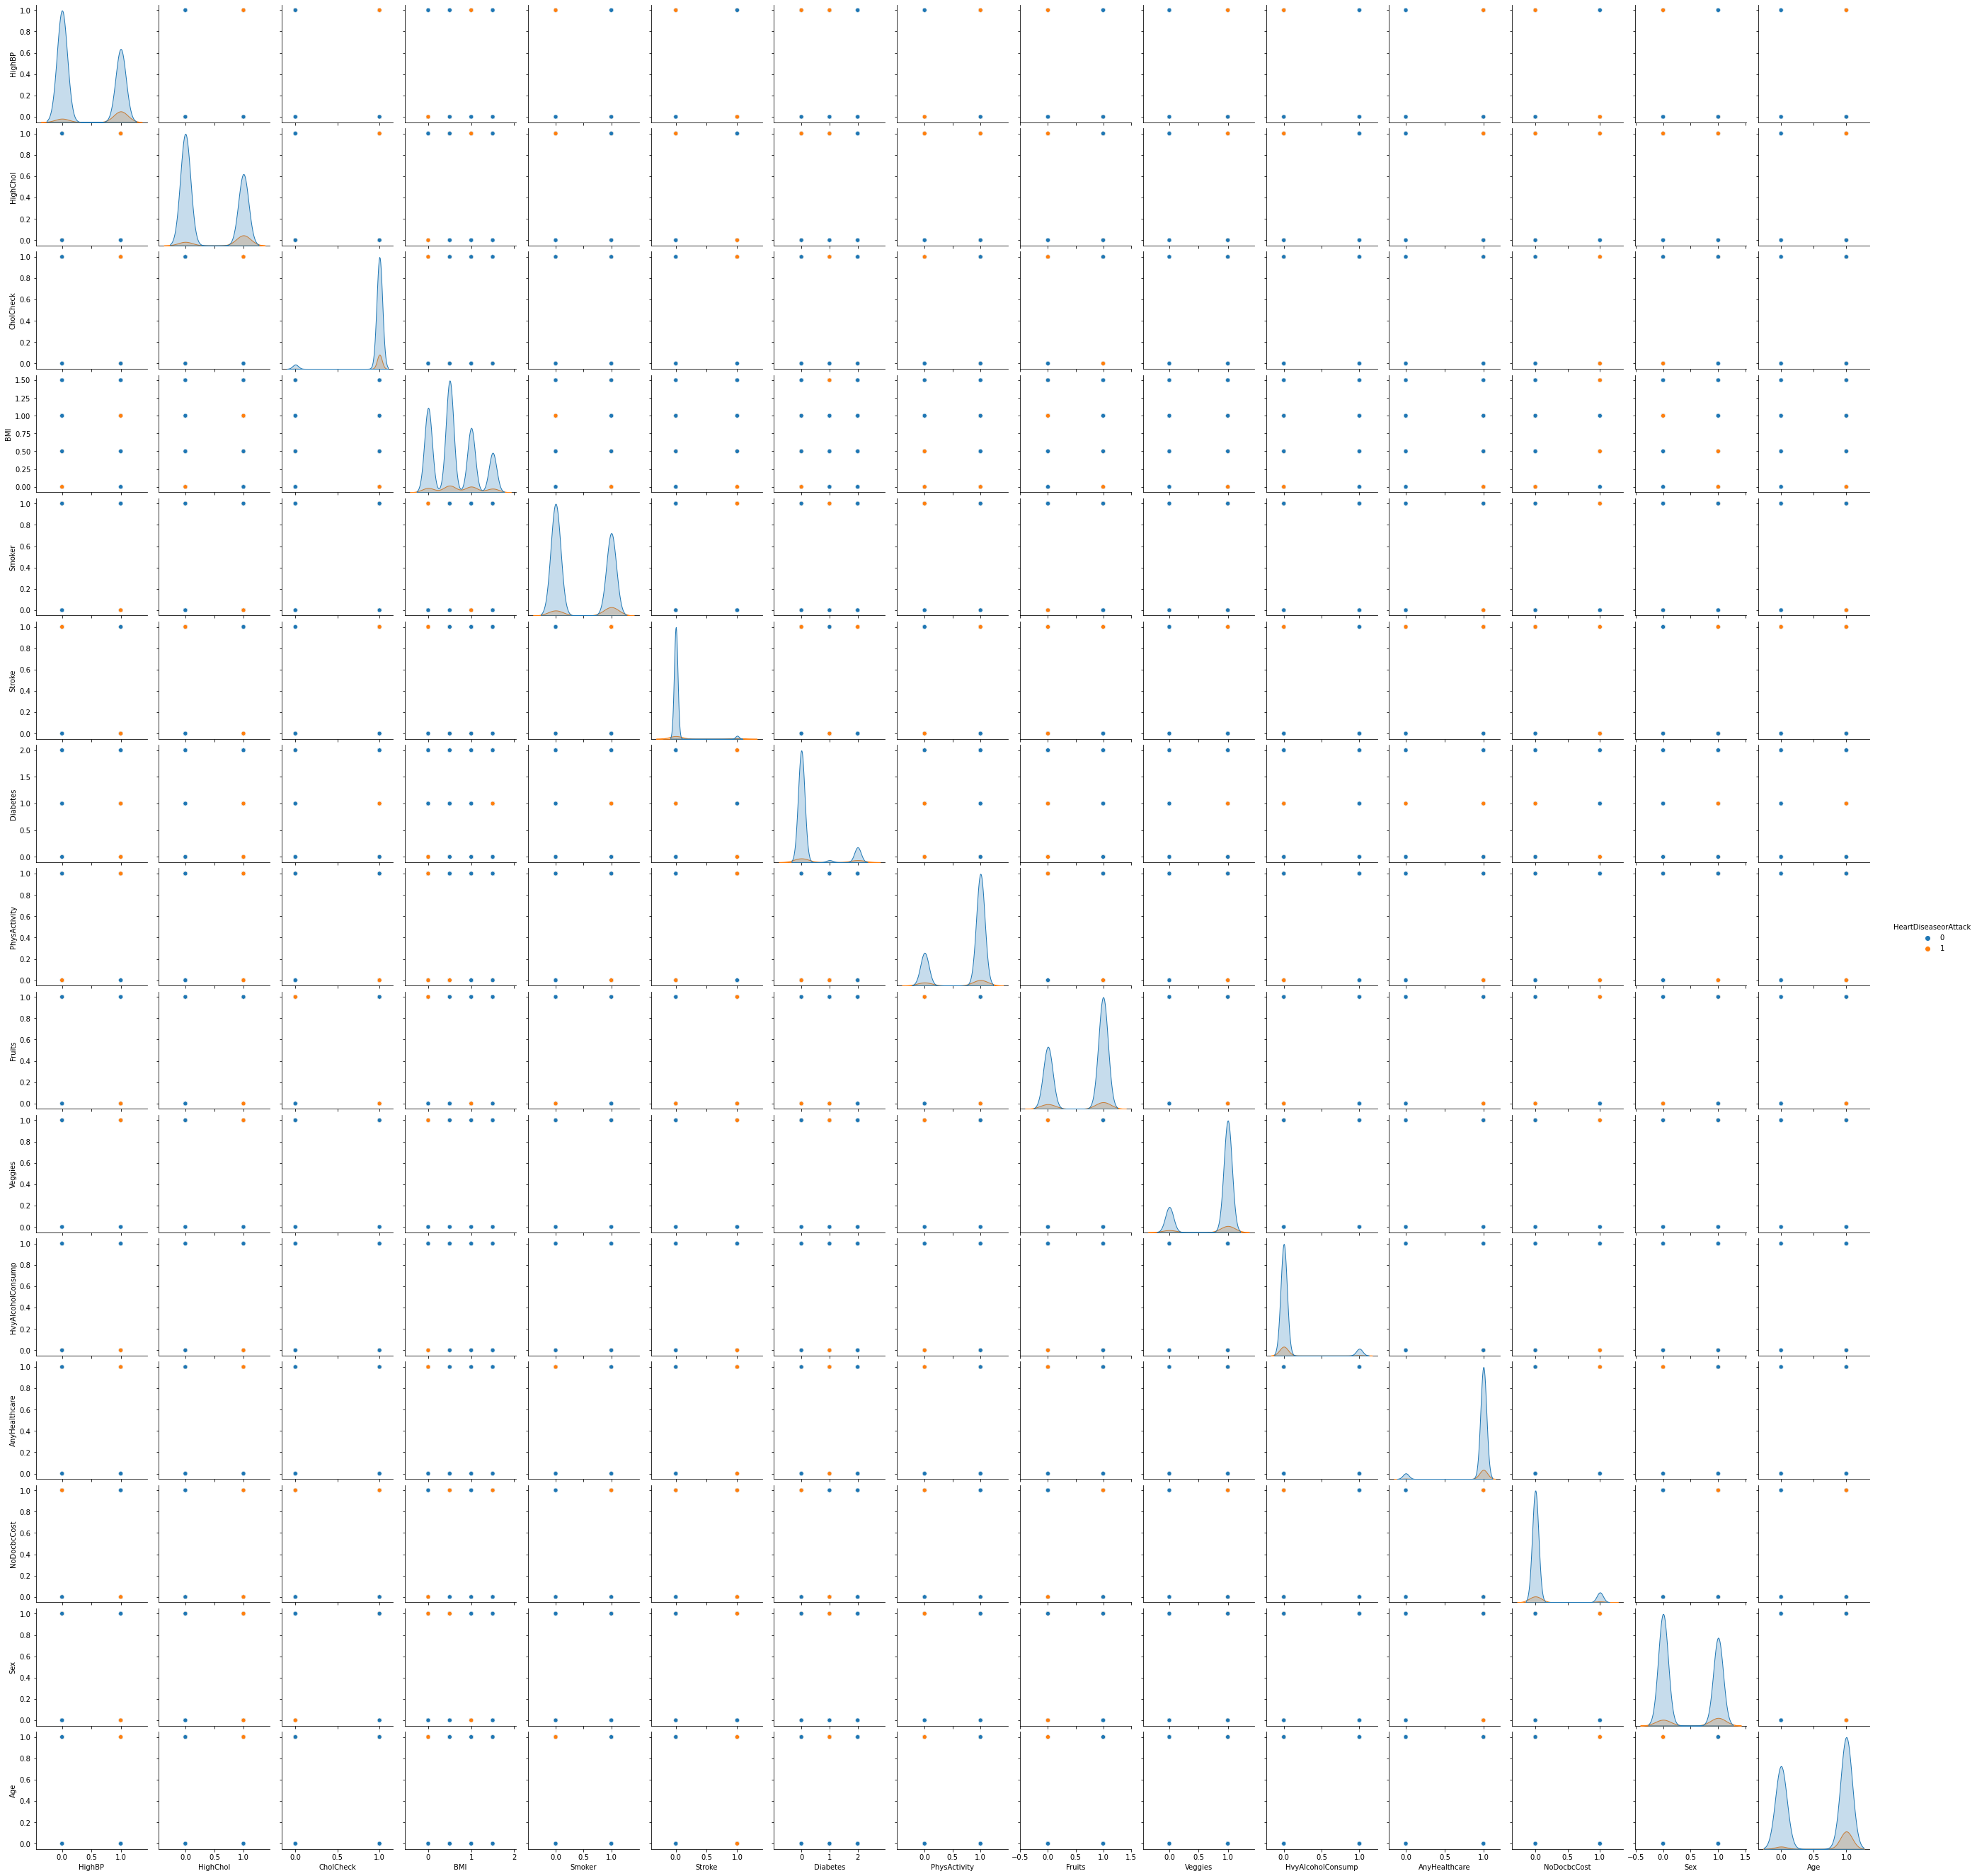

In [13]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='HeartDiseaseorAttack');

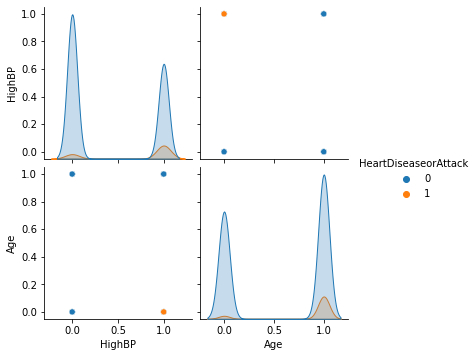

In [141]:
Z = X_train[['HighBP', 'Age']]
sns.pairplot(pd.concat([Z, y_train], axis=1), hue='HeartDiseaseorAttack')
plt.savefig("Small_Pair_Plot.png")

In [142]:
#consider using validate set
for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

HighBP
0.29152514570349003
HighChol
0.29777022079766274
CholCheck
0.31247566704425145
BMI
0.3116834031199087
Smoker
0.30768429693989113
Stroke
0.2998105539172876
Diabetes
0.3021860985627254
PhysActivity
0.31095831653997186
Fruits
0.3132600198647543
Veggies
0.3128444460895784
HvyAlcoholConsump
0.312641277999305
AnyHealthcare
0.3130669537189303
NoDocbcCost
0.3128263695096182
Sex
0.30977587057334177
Age
0.2945163702758676


In [143]:
#lr_model_all = LogisticRegression(C=10000)
lr_model_all = LogisticRegression(class_weight='balanced')
#balanced class weights up weight smaller class
lr_model_all.fit(X_train, y_train)

y_pred = lr_model_all.predict(X_test)
#y_pred_test = lr_model_all.predict(X_test)[:,1]
#lr_model_all.score(X, y)
#metrics.recall_score
recall_score(y_test, y_pred)

0.7349524815205913

[[12831  5275]
 [  502  1392]]


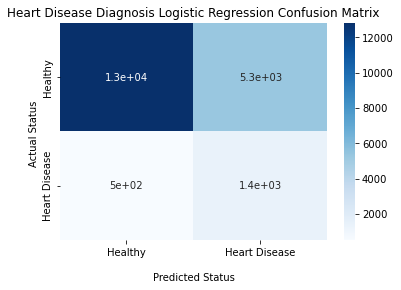

In [262]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Heart Disease Diagnosis Logistic Regression Confusion Matrix');
ax.set_xlabel('\nPredicted Status')
ax.set_ylabel('Actual Status ');
ax.xaxis.set_ticklabels(['Healthy','Heart Disease'])
ax.yaxis.set_ticklabels(['Healthy','Heart Disease'])
plt.savefig("LogReg_Confusion.png")

In [257]:
#instantiate, fit and score a KNN approach
neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
recall_score(y_test, y_pred_knn)

0.20538542766631468

[[16724  1382]
 [ 1505   389]]


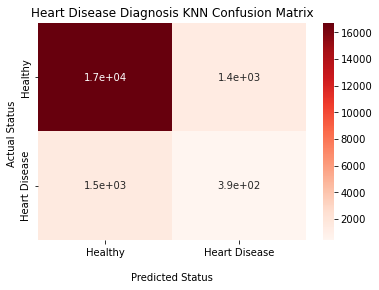

In [260]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Heart Disease Diagnosis KNN Confusion Matrix');
ax.set_xlabel('\nPredicted Status')
ax.set_ylabel('Actual Status ');
ax.xaxis.set_ticklabels(['Healthy','Heart Disease'])
ax.yaxis.set_ticklabels(['Healthy','Heart Disease'])
plt.savefig("KNN_Confusion.png")

In [196]:
#try a tree based approach
tree = DecisionTreeClassifier(random_state=0, max_features = 8)
tree = tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_validate)
recall_score(y_validate, y_pred_tree)

0.06641262928688078

[[17886   277]
 [ 1715   122]]


[Text(0, 0.5, 'Healthy'), Text(0, 1.5, 'Heart Disease')]

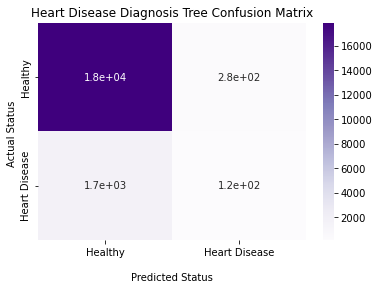

In [211]:
#confusion matrix
cf_matrix = confusion_matrix(y_validate, y_pred_tree)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples')
ax.set_title('Heart Disease Diagnosis Tree Confusion Matrix');
ax.set_xlabel('\nPredicted Status')
ax.set_ylabel('Actual Status ');
ax.xaxis.set_ticklabels(['Healthy','Heart Disease'])
ax.yaxis.set_ticklabels(['Healthy','Heart Disease'])

In [243]:
#extract importance: https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d
#importance = pd.DataFrame({'feature': X_train.columns, 
#'importance' : np.round(tree.feature_importances_, 3)})
#importance.sort_values('importance', ascending=False, inplace = True)
#print(importance)

In [171]:

gbclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=5, random_state=0)
gbclass.fit(X_train, y_train)

y_pred_gb = gbclass.predict(X_test)
recall_score(y_test, y_pred_gb)


0.07391763463569166

In [240]:
#X_rf, y_rf = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
rfc = RandomForestClassifier(n_estimators = 100, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
recall_score(y_test, y_pred_rf)


0.5770855332629355

[[13637  4469]
 [  801  1093]]


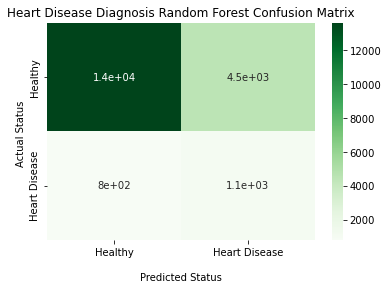

In [261]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('Heart Disease Diagnosis Random Forest Confusion Matrix');
ax.set_xlabel('\nPredicted Status')
ax.set_ylabel('Actual Status ');
ax.xaxis.set_ticklabels(['Healthy','Heart Disease'])
ax.yaxis.set_ticklabels(['Healthy','Heart Disease'])

plt.savefig("Random_Forest_Confusion.png")

In [245]:
#extract importance: https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d
importance = pd.DataFrame({'feature': X_train.columns, 
'importance' : np.round(rfc.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

              feature  importance
0              HighBP       0.147
14                Age       0.146
3                 BMI       0.125
1            HighChol       0.098
6            Diabetes       0.086
5              Stroke       0.075
13                Sex       0.057
4              Smoker       0.050
8              Fruits       0.045
7        PhysActivity       0.043
9             Veggies       0.038
12        NoDocbcCost       0.032
11      AnyHealthcare       0.023
10  HvyAlcoholConsump       0.020
2           CholCheck       0.014
